In [1]:
pip install control

In [2]:
import control
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define transfer function of the system
s = control.tf('s')

# Process

In [4]:
Kp_Process = 70
Tau_Process = 320
Delay_Process = 60

In [5]:
G_Process = Kp_Process/(Tau_Process*s+1)

In [6]:
num, den = control.pade(Delay_Process, n=2, numdeg=0)
Pade_Process = control.tf(num, den)

In [7]:
FOPDT_Process = control.series(G_Process, Pade_Process)
FOPDT_Process

TransferFunction(array([0.03888889]), array([3.20000000e+02, 1.16666667e+01, 2.11111111e-01, 5.55555556e-04]))

In [8]:
t, y = control.step_response(FOPDT_Process)

In [9]:
tmax = t.max()

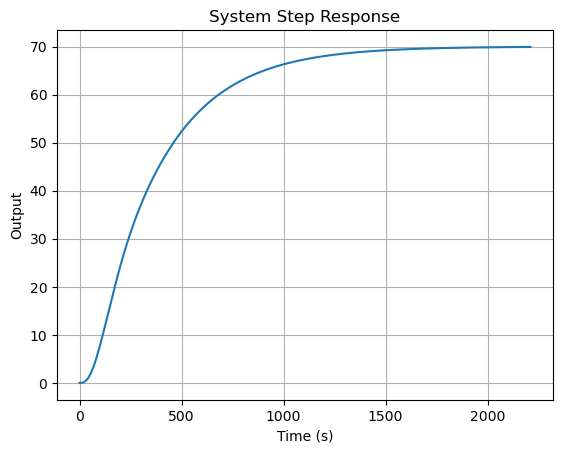

In [10]:
# Plot step response
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()

# Final Element

In [11]:
K_Final_Element = 1
Tau_Final_Element = 0
Delay_Final_Element = 0

In [12]:
G_Final_Element = K_Final_Element/(Tau_Final_Element*s+1)

In [13]:
num, den = control.pade(Delay_Final_Element, n=2, numdeg=0)
Pade_Final_Element = control.tf(num, den)

In [14]:
FOPDT_Final_Element = control.series(G_Final_Element, Pade_Final_Element)
FOPDT_Final_Element

TransferFunction(array([1.]), array([1.]))

# Disturbance

In [15]:
K_disturbance = 1
Tau_disturbance = 320
Delay_disturbance = 60

In [16]:
G_disturbance = K_disturbance/(Tau_disturbance*s+1)

In [17]:
num, den = control.pade(Delay_disturbance, n=2, numdeg=0)
Pade_disturbance = control.tf(num, den)

In [18]:
FOPDT_disturbance = control.series(G_disturbance, Pade_disturbance)

In [19]:
FOPDT_disturbance

TransferFunction(array([0.00055556]), array([3.20000000e+02, 1.16666667e+01, 2.11111111e-01, 5.55555556e-04]))

# Sensor 1 - Feedback Sensor

In [20]:
K_Sensor1 = 1
Tau_Sensor1 = 0
Delay_Sensor1 = 0.0

In [21]:
G_Sensor1 = K_Sensor1/(Tau_Sensor1*s+1)

In [22]:
num, den = control.pade(Delay_Sensor1, n=2, numdeg=0)
Pade_Sensor1 = control.tf(num, den)

In [23]:
FOPDT_Sensor1 = control.series(G_Sensor1, Pade_Sensor1)
FOPDT_Sensor1

TransferFunction(array([1.]), array([1.]))

# Sensor 2 - Feedfoward Sensor

In [24]:
K_Sensor2 = 1
Tau_Sensor2 = 0
Delay_Sensor2 = 0.0

In [25]:
G_Sensor2 = K_Sensor2/(Tau_Sensor2*s+1)

In [26]:
num, den = control.pade(Delay_Sensor2, n=2, numdeg=0)
Pade_Sensor2 = control.tf(num, den)

In [27]:
FOPDT_Sensor2 = control.series(G_Sensor2, Pade_Sensor2)
FOPDT_Sensor2 

TransferFunction(array([1.]), array([1.]))

# Feedback Controller

In [28]:
Kc = 0.06
ti = 416.43
td = 20.81

In [29]:
# Define transfer function of the PID Controller
Feedback_Control = Kc*(1 + (1/(ti*s)) + (td*s))
Feedback_Control

TransferFunction(array([5.19954498e+02, 2.49858000e+01, 6.00000000e-02]), array([416.43,   0.  ]))

# Feedforward Controller

### Dynamic Feedforward Controller

In [30]:
Feedforward_Control = - FOPDT_disturbance/(FOPDT_Sensor2*FOPDT_Final_Element*FOPDT_Process)
Feedforward_Control

TransferFunction(array([-1.77777778e-01, -6.48148148e-03, -1.17283951e-04, -3.08641975e-07]), array([1.24444444e+01, 4.53703704e-01, 8.20987654e-03, 2.16049383e-05]))

### Static Feedforward Controller Gain

FOPDT_Sensor2 = 1
<br> FOPDT_Final_Element = 1 
<br> Tau_disturbance = Tau_Process
<br> Delay_disturbance = Delay_Process

In [31]:
Feedforward_Control = -K_disturbance/Kp_Process
Feedforward_Control

-0.014285714285714285

## Termo de controle regulatório

In [32]:
Tcr = (FOPDT_disturbance + FOPDT_Sensor2*Feedforward_Control*FOPDT_Final_Element*FOPDT_Process)/(1+FOPDT_Sensor1*Feedback_Control*FOPDT_Final_Element*FOPDT_Process)

### Degrau Unitário no Desvio de Carga (Controle Feedback + Feedfoward)

In [33]:
t, y = control.step_response(Tcr, T=tmax)

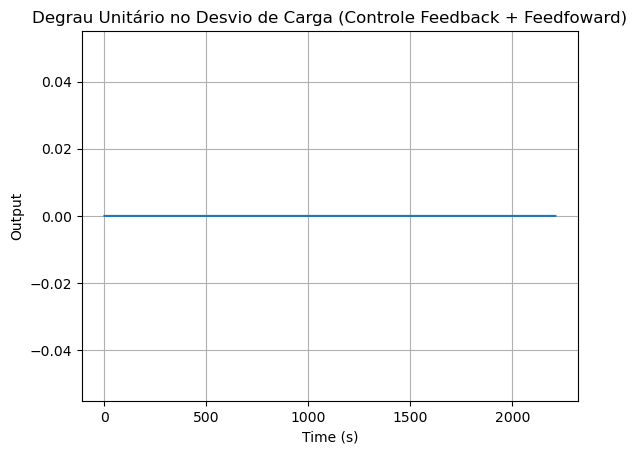

In [34]:
# Plot step response
plt.figure(2)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Degrau Unitário no Desvio de Carga (Controle Feedback + Feedfoward)')
plt.grid()
plt.show()

##  Termo de controle supervisório

In [35]:
Tcs = (Feedback_Control*FOPDT_Final_Element*FOPDT_Process)/(1+FOPDT_Sensor1*Feedback_Control*FOPDT_Final_Element*FOPDT_Process)

In [36]:
t, y = control.step_response(Tcs, T=tmax)

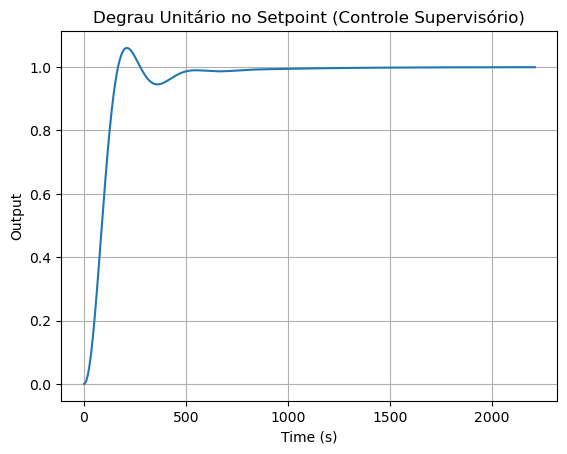

In [37]:
# Plot step response
plt.figure(3)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Degrau Unitário no Setpoint (Controle Supervisório)')
plt.grid()
plt.show()